# ANZ transaction data and Salary Prediction



## ---- Problem Definition---

We have synthesized transaction data from ANZ bank which consists of 100 hypothetical customers.It contains purchases,recurring transactions and salary transactions.The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

Using the same transaction dataset, we are going to identify the annual salary for each customer.We explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Finally, we will build models to predict the annual salary for each customer using the attributes identified above.

## Import the required libraries

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
import math
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data for exploration

The data have been saved in csv format using excel and is extracted below.

In [2]:
loaded_df=pd.read_csv('ANZ_dataset.csv')

## Explore the loaded data

In [3]:
loaded_df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
# explore transaction description to find out salary transactions
loaded_df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

### Find transactions with salary information

In [5]:
#extract dataframe with salary transactions
salary_df=loaded_df[loaded_df['txn_description']=='PAY/SALARY']
salary_df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


### Find annual salary from salary transaction of each customer

In [6]:
#convert extraction into datetime object
salary_df['extraction']=pd.to_datetime(salary_df['extraction'])

#find out total income of each customer for 3 months as salary transaction
three_month_salary_df=salary_df.groupby([salary_df['extraction'].dt.year,'customer_id']).agg({'amount':'sum'}).reset_index()

#calculate annual salary
three_month_salary_df['annual_salary']=three_month_salary_df['amount']*4
annual_salary_df=three_month_salary_df.drop(['amount','extraction'],axis=1)
annual_salary_df

,customer_id,annual_salary
0,CUS-1005756958,50464.44
1,CUS-1117979751,100202.20
2,CUS-1140341822,45996.24
3,CUS-1147642491,88992.28
4,CUS-1196156254,109304.44
...,...,...
95,CUS-72755508,34815.36
96,CUS-809013380,53927.64
97,CUS-860700529,43406.88
98,CUS-880898248,34415.52


### Plot the histogram and box plot of annual salary of customers

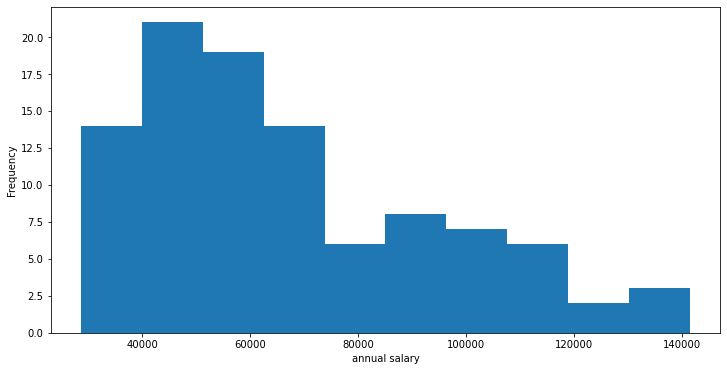

In [7]:
annual_salary_df['annual_salary'].plot(kind='hist',figsize=(12,6))
plt.xlabel('annual salary')
plt.show()

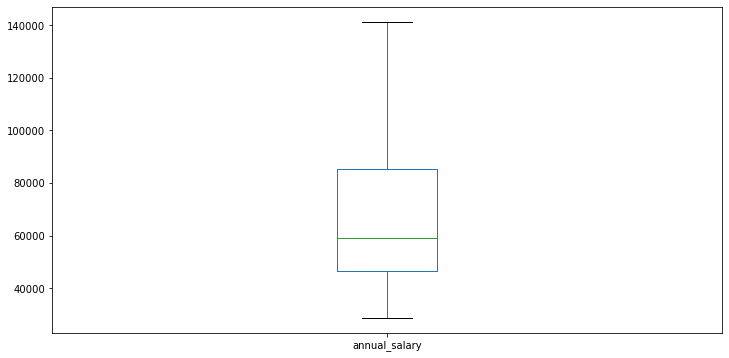

In [8]:
annual_salary_df.plot(kind='box',figsize=(12,6))
plt.show()

## Prepare data for prediction

### merge salary data with loaded transaction data

In [24]:
final_df=pd.merge(annual_salary_df,loaded_df,on='customer_id',how='inner')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        12043 non-null  object 
 1   annual_salary      12043 non-null  float64
 2   status             12043 non-null  object 
 3   card_present_flag  7717 non-null   float64
 4   bpay_biller_code   885 non-null    object 
 5   account            12043 non-null  object 
 6   currency           12043 non-null  object 
 7   long_lat           12043 non-null  object 
 8   txn_description    12043 non-null  object 
 9   merchant_id        7717 non-null   object 
 10  merchant_code      883 non-null    float64
 11  first_name         12043 non-null  object 
 12  balance            12043 non-null  float64
 13  date               12043 non-null  object 
 14  gender             12043 non-null  object 
 15  age                12043 non-null  int64  
 16  merchant_suburb    771

### Let's select data with purchase transactions

In [31]:
final_df=final_df[final_df['card_present_flag']==1.0]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6194 entries, 0 to 12037
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        6194 non-null   object 
 1   annual_salary      6194 non-null   float64
 2   status             6194 non-null   object 
 3   card_present_flag  6194 non-null   float64
 4   bpay_biller_code   2 non-null      object 
 5   account            6194 non-null   object 
 6   currency           6194 non-null   object 
 7   long_lat           6194 non-null   object 
 8   txn_description    6194 non-null   object 
 9   merchant_id        6194 non-null   object 
 10  merchant_code      0 non-null      float64
 11  first_name         6194 non-null   object 
 12  balance            6194 non-null   float64
 13  date               6194 non-null   object 
 14  gender             6194 non-null   object 
 15  age                6194 non-null   int64  
 16  merchant_suburb    6194

### Let's keep only relevant columns and drop non-relevant columns

In [35]:
final_df=final_df[['long_lat','txn_description','age','gender','annual_salary','balance','merchant_state','amount','movement']]
final_df.head()

,long_lat,txn_description,age,gender,annual_salary,balance,merchant_state,amount,movement
0,153.03 -27.51,POS,53,F,50464.44,463.96,QLD,6.48,debit
1,153.03 -27.51,SALES-POS,53,F,50464.44,424.01,QLD,39.95,debit
2,153.03 -27.51,POS,53,F,50464.44,401.05,NSW,22.96,debit
4,153.03 -27.51,SALES-POS,53,F,50464.44,377.29,QLD,14.65,debit
6,153.03 -27.51,SALES-POS,53,F,50464.44,207.52,QLD,21.77,debit


### convert longitude and latitude into two different column values

In [36]:
final_df['long'],final_df['lat']=final_df['long_lat'].str.split('-',1).str
final_df.drop('long_lat',axis=1,inplace=True)

In [37]:
final_df['long']=final_df['long'].astype('float')
final_df['lat']=final_df['lat'].astype('float')

### remove duplicate rows if present from above dataframe 

In [38]:
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True,inplace=True)
final_df

,txn_description,age,gender,annual_salary,balance,merchant_state,amount,movement,long,lat
0,POS,53,F,50464.44,463.96,QLD,6.48,debit,153.03,27.51
1,SALES-POS,53,F,50464.44,424.01,QLD,39.95,debit,153.03,27.51
2,POS,53,F,50464.44,401.05,NSW,22.96,debit,153.03,27.51
3,SALES-POS,53,F,50464.44,377.29,QLD,14.65,debit,153.03,27.51
4,SALES-POS,53,F,50464.44,207.52,QLD,21.77,debit,153.03,27.51
...,...,...,...,...,...,...,...,...,...,...
6189,POS,19,F,111368.88,17464.58,NSW,26.34,debit,150.82,34.01
6190,POS,19,F,111368.88,17152.12,NSW,6.46,debit,150.82,34.01
6191,SALES-POS,19,F,111368.88,16898.37,NSW,21.73,debit,150.82,34.01
6192,POS,19,F,111368.88,16857.12,NSW,41.25,debit,150.82,34.01


## Find out the correlation of different features with target variable(annual_salary)

In [39]:
#this function encodes categorical variable with corresponding mean value of salary
def encode_label(df,cat_col):
    cat_dic={}
    cats=df[cat_col].cat.categories.tolist()
    for cat in cats:
        cat_dic[cat]=df[df[cat_col]==cat]['annual_salary'].mean()
    df[cat_col]=df[cat_col].map(cat_dic)

In [40]:
#this function plots heatmap to show correlation among different variables
def visual_correlation(df,num_col,cat_col,target_var):
    for column in cat_col:
        df[column]=df[column].astype("category")
        encode_label(df,column)
        df[column]=pd.to_numeric(df[column])

    fig=plt.figure(figsize=(12,7))
    sns.heatmap(df[num_col+cat_col+[target_var]].corr(),cmap='Greens',annot=True)
    plt.xticks(rotation=45)

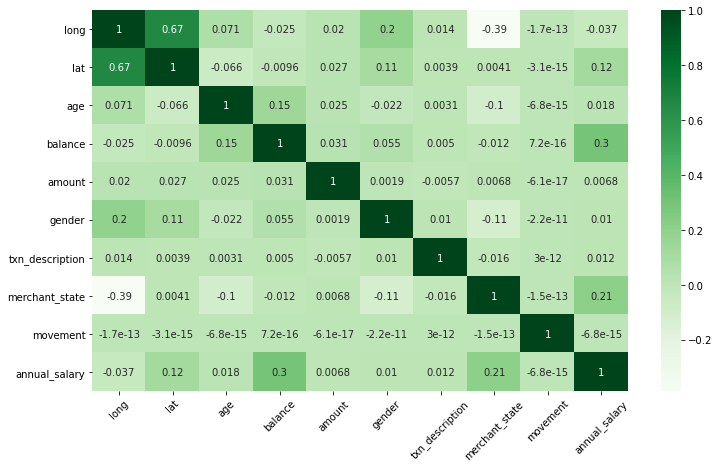

In [46]:
final_df_encoded=final_df.copy()
num_col=['long','lat','age','balance','amount']
cat_col=['gender','txn_description','merchant_state','movement']
target_var="annual_salary"
visual_correlation(final_df_encoded,num_col,cat_col,target_var)

## predict salary and find error using different models

### encode categoical columns into numeric values

In [47]:
def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines result with continous variables'''
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False)

In [48]:
df_feature_encoded=one_hot_encode_feature_df(final_df,cat_col,num_col)

### Drop one column from the encoded categories and get final features and target dataframe

In [49]:
df_feature_encoded.drop('gender_F',axis='columns',inplace=True)
df_feature_encoded.drop('txn_description_POS',axis='columns',inplace=True)
df_feature_encoded.drop('merchant_state_ACT',axis='columns',inplace=True)

df_feature_encoded

,gender_M,txn_description_SALES-POS,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_debit,long,lat,age,balance,amount
0,0,0,0,0,1,0,0,0,0,1,153.03,27.51,53,463.96,6.48
1,0,1,0,0,1,0,0,0,0,1,153.03,27.51,53,424.01,39.95
2,0,0,1,0,0,0,0,0,0,1,153.03,27.51,53,401.05,22.96
3,0,1,0,0,1,0,0,0,0,1,153.03,27.51,53,377.29,14.65
4,0,1,0,0,1,0,0,0,0,1,153.03,27.51,53,207.52,21.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,0,0,1,0,0,0,0,0,0,1,150.82,34.01,19,17464.58,26.34
6190,0,0,1,0,0,0,0,0,0,1,150.82,34.01,19,17152.12,6.46
6191,0,1,1,0,0,0,0,0,0,1,150.82,34.01,19,16898.37,21.73
6192,0,0,1,0,0,0,0,0,0,1,150.82,34.01,19,16857.12,41.25


In [50]:
df_target=final_df[target_var]
df_target

0        50464.44
1        50464.44
2        50464.44
3        50464.44
4        50464.44
          ...    
6189    111368.88
6190    111368.88
6191    111368.88
6192    111368.88
6193    111368.88
Name: annual_salary, Length: 6194, dtype: float64

### Define a functions which tries different model and finds best score and best parameters

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
'define a function which tries different models and gives the best with best parameters'

def find_best_model_param_gridsearchcv(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

### call the function on our data

In [53]:
find_best_model_param_gridsearchcv(df_feature_encoded,df_target)

,model,best_score,best_params
0,linear_regression,0.159846,{'normalize': False}
1,lasso,0.159807,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.991703,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**From above results we can see that linear regression is very poor at predicting salary based on different features derived above but decision tree is excellent model for predicting salary based on transaction data.**